In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
from tqdm import tqdm
import sys

# Strong Current

## Small-mesoscale advection

In [2]:
SC_MS_stats_ds = xr.open_dataset('../binned_stats_data/Strong_temp1_rate_eddy_adv_300km_binned_statistics_2016.nc')
SC_MS_adv = SC_MS_stats_ds.eddy_adv_ml_bin_left.data
SC_MS_SSTA_mean = SC_MS_stats_ds.temp1_rate_ml_mean.data
SC_MS_SSTA_std = SC_MS_stats_ds.temp1_rate_ml_std.data
SC_MS_bin_population = SC_MS_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [3]:
SC_MS_SSTA_std.mean()

154.28551756221802

## Total advection

In [13]:
SC_LS_stats_ds = xr.open_dataset('../binned_stats_data/Strong_temp_rate_total_adv_binned_statistics_2016.nc')
SC_LS_adv = SC_LS_stats_ds.temp_adv_ml_bin_left.data
SC_LS_SSTA_mean = SC_LS_stats_ds.temp_rate_ml_mean.data
SC_LS_SSTA_std = SC_LS_stats_ds.temp_rate_ml_std.data
SC_LS_bin_population = SC_LS_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [14]:
SC_LS_SSTA_std.mean()

89.15150391560381

## Large-mesoscale

In [18]:
SC_stats_ds = xr.open_dataset('../binned_stats_data/Strong_temp1_rate_eddy_adv_zonal_filter_binned_statistics_2016.nc')
SC_adv = SC_stats_ds.eddy_adv_ml_bin_left.data
SC_SSTA_mean = SC_stats_ds.temp_rate_ml_mean.data
SC_SSTA_std = SC_stats_ds.temp_rate_ml_std.data
SC_bin_population = SC_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [19]:
SC_SSTA_std.mean()

202.73531631250808

# Weak Current

## Small-mesoscale advection

In [20]:
WC_MS_stats_ds = xr.open_dataset('../binned_stats_data/Weak_temp1_rate_eddy_adv_300km_binned_statistics_2016.nc')
WC_MS_adv = WC_MS_stats_ds.eddy_adv_ml_bin_left.data
WC_MS_SSTA_mean = WC_MS_stats_ds.temp1_rate_ml_mean.data
WC_MS_SSTA_std = WC_MS_stats_ds.temp1_rate_ml_std.data
WC_MS_bin_population = WC_MS_stats_ds.eddy_adv_ml_bin_population.data/1e6 #unit: million

In [21]:
WC_MS_SSTA_std.mean()

36.04912153586293

## Total advection

In [22]:
WC_LS_stats_ds = xr.open_dataset('../binned_stats_data/Weak_temp_rate_total_adv_binned_statistics_2016.nc')
WC_LS_adv = WC_LS_stats_ds.temp_adv_ml_bin_left.data
WC_LS_SSTA_mean = WC_LS_stats_ds.temp_rate_ml_mean.data
WC_LS_SSTA_std = WC_LS_stats_ds.temp_rate_ml_std.data
WC_LS_bin_population = WC_LS_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [23]:
WC_LS_SSTA_std.mean()

63.36256797312896

### Large-mesoscale

In [26]:
WC_stats_ds = xr.open_dataset('../binned_stats_data/Weak_temp1_rate_eddy_adv_zonal_filter_binned_statistics_2016.nc')
WC_adv = WC_stats_ds.eddy_adv_ml_bin_left.data
WC_SSTA_mean = WC_stats_ds.temp_rate_ml_mean.data
WC_SSTA_std = WC_stats_ds.temp_rate_ml_std.data
WC_bin_population = WC_stats_ds.eddy_adv_ml_bin_population.data/1e6

In [27]:
WC_SSTA_std.mean()

51.81489206005167

# Plots

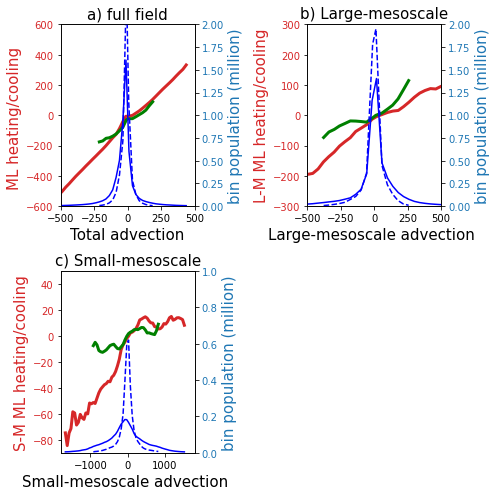

In [28]:
mean_min, mean_max = -500, 500
sst_min, sst_max = -600, 600
ymin, ymax = 0, 2.0
fig, ((ax5, ax3), (ax1, ax0)) = plt.subplots(nrows = 2, ncols = 2, figsize=(7, 7))
ax0.axis('off')

# TOTAL
color = 'tab:red'
ax5.set_xlabel('Total advection', fontsize=15)
ax5.set_ylabel('ML heating/cooling ', color=color, fontsize=15)

ax5.plot(SC_LS_adv, SC_LS_SSTA_mean, color=color, linewidth = 3) # Strong

ax5.plot(WC_LS_adv , WC_LS_SSTA_mean, color='green', linewidth = 3) # Weak

ax5.tick_params(axis='y', labelcolor=color)
ax5.set_xlim([mean_min, mean_max])
ax5.set_ylim([sst_min, sst_max])
ax5.set_title('a) full field', fontsize=15) 

ax6 = ax5.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax6.set_ylabel('bin population (million)', color=color, fontsize=15)  # we already handled the x-label with ax1
ax6.plot(SC_LS_adv , SC_LS_bin_population,color = 'blue')
ax6.plot(WC_LS_adv , WC_LS_bin_population,color = 'blue', linestyle = '--')
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_ylim([ymin, ymax])

eddy_min, eddy_max = -500, 500
sst_min, sst_max = -300, 300
ymin, ymax = 0, 2

# Large-mesoscale

color = 'tab:red'
ax3.set_xlabel('Large-mesoscale advection ', fontsize=15) # ($Watt/m^2$)
ax3.set_ylabel('L-M ML heating/cooling', color=color, fontsize=15)

ax3.plot(SC_adv, SC_SSTA_mean, color=color, linewidth = 3) # Strong

ax3.plot(WC_adv , WC_SSTA_mean, color='green', linewidth = 3) # Weak
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_xlim([eddy_min, eddy_max])
ax3.set_ylim([sst_min, sst_max])
ax3.set_title('b) Large-mesoscale', fontsize = 15) #' S = ' + str(int(SC_s_meso)))

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('bin population (million)', color=color, fontsize = 15)  # we already handled the x-label with ax1
ax4.plot(SC_adv, SC_bin_population, color = 'blue')
ax4.plot(WC_adv, WC_bin_population, color = 'blue', linestyle = '--')
ax4.tick_params(axis='y', labelcolor=color)
ax4.set_ylim([ymin, ymax])

# Small-mesoscale
eddy_min, eddy_max = -1800, 1800
sst_min, sst_max = -90, 50
ymin, ymax = 0, 1
color = 'tab:red'
ax1.set_xlabel('Small-mesoscale advection ', fontsize=15) # ($Watt/m^2$)
ax1.set_ylabel('S-M ML heating/cooling', color=color, fontsize=15)

l1 = ax1.plot(SC_MS_adv, SC_MS_SSTA_mean, color=color, linewidth = 3) # Strong

l2 = ax1.plot(WC_MS_adv , WC_MS_SSTA_mean, color='green', linewidth = 3) # Weak
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim([eddy_min, eddy_max])
ax1.set_ylim([sst_min, sst_max])
ax1.set_title('c) Small-mesoscale', fontsize = 15) #' S = ' + str(int(SC_s_meso)))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('bin population (million)', color=color, fontsize = 15)  # we already handled the x-label with ax1
l3 = ax2.plot(SC_MS_adv, SC_MS_bin_population, color = 'blue')
l4 = ax2.plot(WC_MS_adv, WC_MS_bin_population, color = 'blue', linestyle = '--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([ymin, ymax])

#line_labels = ['SC, bin-average', 'WC, bin-average' ,'SC,bin population', 'WC, bin popolation']
#fig.legend([l1, l2, l3, l4],     # The line objects
#           labels=line_labels,   # The labels for each line
#           loc="lower right",   # Position of legend
#           borderaxespad = 2.8,    # spacing around legend box
#           title=" ", # Title for the legend
#           prop={'size': 12})

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('Fig10_ml_heating_cooling.png')